In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Aug 12 18:58:31 2023

@author: sagar
"""  

# This is the first trial program using keras
# to make a neural network with different functions of keras

'\nCreated on Sat Aug 12 18:58:31 2023\n\n@author: sagar\n'

In [2]:
from keras import *
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.dpi']=100 # highres display

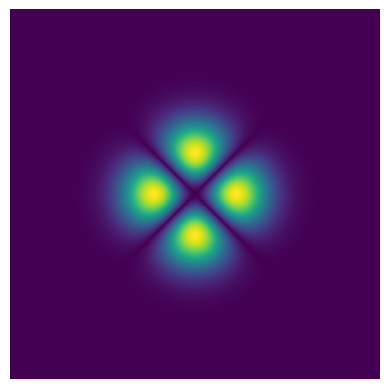

In [3]:
def myFunc(x0,x1):     # this is the function to get the 2 to pixel value mapping
    #val=image
    r2=x0**2+x1**2
    #val=np.sin(20*r2)
    val=(np.exp(-5*r2)*abs(x0+x1)*abs(x0-x1))
    #val=abs(x0+x1)*abs(x0-x1)

    #smilei face
    r_face2=x0**2+x1**2
    r_reye2=(x0-0.150)**2+(x1-0.15)**2
    r_leye2=(x0+0.150)**2+(x1-0.15)**2
    r_smile2=x0**2/10+(x1+0.200)**2
    #val=(r_face2<0.25)*(r_leye2>0.01)*(r_reye2>0.01)*(r_smile2>0.01)
    #val=(r_face2<0.25)*(r_leye2>0.01)*(r_reye2>0.01)*(r_smile2>0.0)*(1-1.1*np.exp(-r_leye2*10))*(1-1.1*np.exp(-r_reye2*10))*np.exp(-15*r_face2)


    #oneside
    #val=(x0>0)
    
    #twoside
    #val=(x0*x1>0)*abs(x0*x1)**0.2
    
    return(val)

xrange=np.linspace(-2,2,1001)
X0,X1=np.meshgrid(xrange,xrange)
plt.imshow(myFunc(X0,X1),interpolation='nearest',origin='lower')
plt.axis('off')
plt.show()

In [4]:
def make_batch():
    global batchsize
    inputs=np.random.uniform(low=-1,high=+1,size=[batchsize,2])
    targets=np.zeros([batchsize,1]) # must have right dimensions
    targets[:,0]=myFunc(inputs[:,0],inputs[:,1])
    return(inputs,targets)

In [5]:
# Define the architecture [20,1500,2130,200,200,1]
architecture = [2,200,1]

# Create a Sequential model
model = Sequential()

# Add layers to the model
for i, units in enumerate(architecture):
    if i == 0:
        # Input layer
        model.add(Dense(units, activation='relu', input_dim=architecture[0]))
    elif i < len(architecture) - 1:
        # Hidden layers
        model.add(Dense(units, activation='relu'))
    else:
        # Output layer
        model.add(Dense(units, activation='relu'))

In [6]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

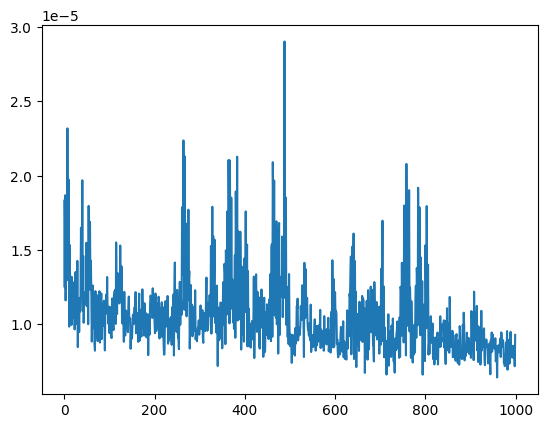

In [15]:
batchsize=500
bataches=1000
costs=np.zeros(bataches)

for k in range(bataches):
    y_in,y_target=make_batch()
    costs[k]=model.train_on_batch(y_in,y_target)[0]

plt.plot(costs)

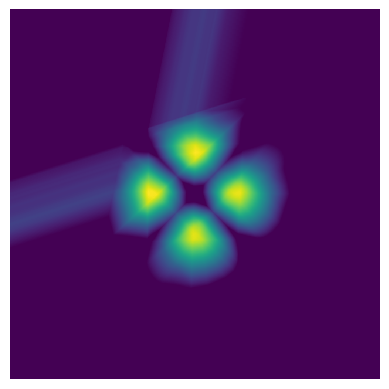

In [16]:
# try to evaluate the (randomly initialized) network
# on some area in the 2D plane
xrange=np.linspace(-2,2,1001)
X0,X1=np.meshgrid(xrange,xrange)
test_batchsize=np.shape(X0)[0]*np.shape(X0)[1]
testsample=np.zeros([test_batchsize,2])
testsample[:,0]=X0.flatten()
testsample[:,1]=X1.flatten()

testoutput=model.predict_on_batch(testsample)
plt.imshow(np.reshape(testoutput,np.shape(X0)),origin='lower',interpolation='none')
plt.axis('off')
plt.show()